# Data Cleaning

Data analysts and scientists spend most of their time cleaning data and pre-processing messy datasets. Data cleaning and pre-processing is the process of identifying, updating, and removing corrupt or incorrect data. Data cleaning is a set of activities such as handling missing values, removing outliers, feature encoding, scaling, transformation, and splitting.

In [3]:
# import pandas 
import pandas as pd

# Read the data using csv
data=pd.read_csv('employee.csv')

# See initial 5 records
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [3]:
# See last 5 records
data.tail()

,name,age,income,gender,department,grade,performance_score
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [4]:
# Print list of columns in the data
print(data.columns)

data.name
data['name']

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')


0      Allen Smith
1          S Kumar
2      Jack Morgan
3        Ying Chin
4    Dheeraj Patel
5    Satyam Sharma
6     James Authur
7       Josh Wills
8         Leo Duck
Name: name, dtype: object

In [5]:
# Print the shape of a DataFrame
print(data.shape)

(9, 7)


In [6]:
# Check the information of DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [7]:
# Check the descriptive statistics
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


## Column-wise filtration

In [10]:
# Filter columns 
data.filter(['name', 'department'])
#data[['name', 'department']]

,name,department
0,Allen Smith,Operations
1,S Kumar,Finance
2,Jack Morgan,Finance
3,Ying Chin,Sales
4,Dheeraj Patel,Operations
5,Satyam Sharma,Sales
6,James Authur,Operations
7,Josh Wills,Finance
8,Leo Duck,Sales


In [13]:
# Filter column “name”
data['name']
data.name

# Try the following and get an error
#data['name'].info()

AttributeError: 'Series' object has no attribute 'info'

In [15]:
# Filter column “name” 
data[['name']]

#data[['name']].info()

,name
0,Allen Smith
1,S Kumar
2,Jack Morgan
3,Ying Chin
4,Dheeraj Patel
5,Satyam Sharma
6,James Authur
7,Josh Wills
8,Leo Duck


In [13]:
# Filter two columns: name and department
data[['name','department']]

,name,department
0,Allen Smith,Operations
1,S Kumar,Finance
2,Jack Morgan,Finance
3,Ying Chin,Sales
4,Dheeraj Patel,Operations
5,Satyam Sharma,Sales
6,James Authur,Operations
7,Josh Wills,Finance
8,Leo Duck,Sales


## Row-wise filtration

In [16]:
# Select rows for specific index (axis=0 means rows)
data.filter([0,1,2],axis=0)

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674


In [24]:
# Filter data using slicing
data[2:5]

,name,age,income,gender,department,grade,performance_score
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [25]:
# Filter data for specific value 
data[data.department=='Sales']

,name,age,income,gender,department,grade,performance_score
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [26]:
# Select data for multiple values
data[data.department.isin(['Sales','Finance'])]

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [27]:
# Filter employee who has more than 700 performance score
data[(data.performance_score >=700)]

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [28]:
# Filter employee who has more than 500 and less than 700 performance score
data[(data.performance_score >=500) & (data.performance_score < 700)]

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


In [29]:
# Filter employee who has performance score less than 500
data.query('performance_score<500')

,name,age,income,gender,department,grade,performance_score
6,James Authur,54.0,NaN,F,Operations,G3,53


## Handling Missing Values

Missing values are the values that absent from the data. Absent values can occur due to human error, privacy concerns, or the value not being filled in by the respondent filling in the survey, etc. This is the most common problem in data science and the first step of data pre-processing. Missing values can be handled in the following ways:
* Drop the missing value records.
* Fill in the missing value manually.
* Fill in the missing values using the measures of tendency, such as mean, median, and mode. The mean is used to impute the numeric feature, the dedian is used to impute the ordinal feature, and the mode or highest occurring value is used to impute the categorical feature.
* Fill in the most probable value using machine learning models such as regression, decision trees, KNNs.

It is important to understand that in some cases, missing values will not impact the data. For example, driver license numbers, social security numbers, or any other unique ID will not impact the machine learning models becauses they cannot be used as features in the models.

### Dropping Missing Values

In [30]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [31]:
# Drop missing value rows using dropna() function
data=data.dropna()
data

,name,age,income,gender,department,grade,performance_score
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


### Filling Missing Values

In [46]:
# Read the data
data=pd.read_csv('employee.csv')

# Fill all the missing values in the age column with mean of the age column
data['age']=data.age.fillna(data.age.mean())
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.000000,NaN,NaN,Operations,G3,723
1,S Kumar,40.428571,16000.0,F,Finance,G0,520
2,Jack Morgan,32.000000,35000.0,M,Finance,G2,674
3,Ying Chin,45.000000,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711
5,Satyam Sharma,40.428571,62000.0,NaN,Sales,G3,649
6,James Authur,54.000000,NaN,F,Operations,G3,53
7,Josh Wills,54.000000,52000.0,F,Finance,G3,901
8,Leo Duck,23.000000,98000.0,M,Sales,G4,709


In [47]:
# Fill all the missing values in the income column with a median of the income column
data['income']=data.income.fillna(data.income.median())
data


,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.000000,52000.0,NaN,Operations,G3,723
1,S Kumar,40.428571,16000.0,F,Finance,G0,520
2,Jack Morgan,32.000000,35000.0,M,Finance,G2,674
3,Ying Chin,45.000000,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711
5,Satyam Sharma,40.428571,62000.0,NaN,Sales,G3,649
6,James Authur,54.000000,52000.0,F,Operations,G3,53
7,Josh Wills,54.000000,52000.0,F,Finance,G3,901
8,Leo Duck,23.000000,98000.0,M,Sales,G4,709


In [50]:
# Fill all the missing values in the gender column(category column) with the mode of the gender column
# mode(): Returns a series of the highest frequency value.

data['gender']=data['gender'].fillna(data['gender'].mode()[0])
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.000000,52000.0,F,Operations,G3,723
1,S Kumar,40.428571,16000.0,F,Finance,G0,520
2,Jack Morgan,32.000000,35000.0,M,Finance,G2,674
3,Ying Chin,45.000000,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711
5,Satyam Sharma,40.428571,62000.0,F,Sales,G3,649
6,James Authur,54.000000,52000.0,F,Operations,G3,53
7,Josh Wills,54.000000,52000.0,F,Finance,G3,901
8,Leo Duck,23.000000,98000.0,M,Sales,G4,709


### Dropping Outliers

We can drop the outliers using ``Standard Deviation``. In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range.

In [51]:
# Read the data
data=pd.read_csv('employee.csv')

# Dropping the outliers using Standard Deviation
upper_limit= data['performance_score'].mean () +  2*data['performance_score'].std ()
lower_limit = data['performance_score'].mean () - 2*data['performance_score'].std () 
data = data[(data['performance_score'] < upper_limit) & (data['performance_score'] > lower_limit)]
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


``quantile()`` returns values at the given quantile over requested axis.

In [27]:
# Read the data
data=pd.read_csv('employee.csv')

# Drop the outlier observations using Percentiles
upper_limit = data['performance_score'].quantile(.99)
lower_limit = data['performance_score'].quantile(.01)
data = data[(data['performance_score'] < upper_limit) & (data['performance_score'] > lower_limit)]
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


## Feature Encoding Techniques

Machine learning models are mathematical models that required numeric and integer values for computation. Such models cannot work on categorical features. That is why we often need to convert categorical features into numerical ones. Machine learning model performance is affected by what encoding technique we use.

### One-hot Encoding

One-hot encoding transforms the categorical column into labels and splits the column into multiple columns. The numbers are replaced by binary values 0s and 1s. For example:
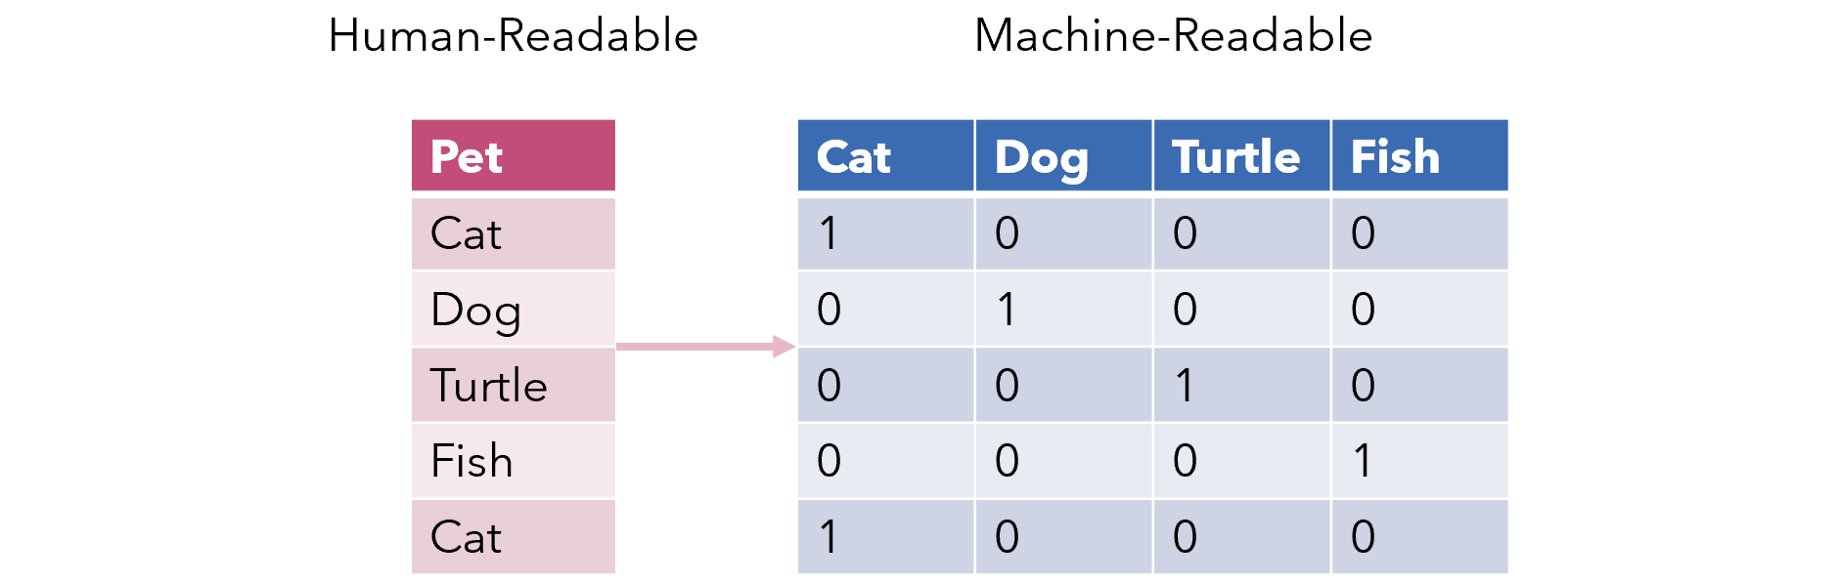

One-hot encoding can also be performed using the ``get_dummies()`` function.

In [28]:
# Read the data
data=pd.read_csv('employee.csv')
# Dummy encoding
encoded_data = pd.get_dummies(data['gender'])

# Join the encoded _data with original dataframe
data = data.join(encoded_data)

# Check the top-5 records of the dataframe
data.head()

,name,age,income,gender,department,grade,performance_score,F,M
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723,0,0
1,S Kumar,NaN,16000.0,F,Finance,G0,520,1,0
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674,0,1
3,Ying Chin,45.0,65000.0,F,Sales,G3,556,1,0
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,1,0


Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms.

In [29]:
# Import one hot encoder  
from sklearn.preprocessing import OneHotEncoder 
  
# Initialize the one hot encoder object
onehotencoder = OneHotEncoder() 

# Read the data
data=pd.read_csv('employee.csv')

# Fill all the missing values in income column(category column) with mode of age column
data['gender']=data['gender'].fillna(data['gender'].mode()[0])

# Fit and transforms the gender column
encoded_data = onehotencoder.fit_transform(data[['gender']]).toarray()

encoded_data = pd.DataFrame(data = encoded_data, columns=['F', 'M'])

# Join the encoded _data with original dataframe
data = data.join(encoded_data)

# Check the top-5 records of the dataframe
data.head()

,name,age,income,gender,department,grade,performance_score,F,M
0,Allen Smith,45.0,NaN,F,Operations,G3,723,1.0,0.0
1,S Kumar,NaN,16000.0,F,Finance,G0,520,1.0,0.0
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674,0.0,1.0
3,Ying Chin,45.0,65000.0,F,Sales,G3,556,1.0,0.0
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,1.0,0.0


###  Label Encoding

Label encoding is also known as integer encoding. Integer encoding replaces categorical values with numeric values. The unique values in variables are replaced with a sequence of integer values. For example, let's say there are three categories: red, green, and blue. These three categories can be encoded with integer values: red as 0, green as 1, and blue as 2.

In [30]:
# Import pandas  
import pandas as pd
# Read the data
data=pd.read_csv('employee.csv')
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiate the Label Encoder Object
label_encoder = LabelEncoder()
# Fit and transform the column
encoded_data = label_encoder.fit_transform(data['department'])
# Print the encoded
print(encoded_data)

[1 0 0 2 1 2 1 0 2]


In [31]:
# Perform inverse encoding
inverse_encode=label_encoder.inverse_transform(encoded_data)
# Print inverse encode
print(inverse_encode) 

['Operations' 'Finance' 'Finance' 'Sales' 'Operations' 'Sales'
 'Operations' 'Finance' 'Sales']


### Ordinal Encoding

Ordinal encoding is similar to label encoding, except there is an order to the encoding. The output encoding starts from 0 and ends at one less than the size of the categories. Let's look at an example containing employee grades such as G0, G1, G2, G3, and G4. These five grades can be encoded with ordinal integer values: 0, 1, 2, 3, 4.

In [53]:
# Import pandas and OrdinalEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# Load the data
data=pd.read_csv('employee.csv')

# Initialize OrdinalEncoder with order 
# the catagoriy must be of shape (n, x) where n is the number of features
cat = list(np.array(['G0','G1','G2','G3','G4']).reshape(1, 5))
order_encoder=OrdinalEncoder(categories=cat)

# fit and transform the grade 
# fit_transform expects a 2-D array as data to fit and transform, column: the number of features (in this case =1)
data['grade_encoded'] = order_encoder.fit_transform(data['grade'].to_numpy().reshape(-1, 1))

# Check top-5 records of the dataframe
data.head()

,name,age,income,gender,department,grade,performance_score,grade_encoded
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723,3.0
1,S Kumar,NaN,16000.0,F,Finance,G0,520,0.0
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674,2.0
3,Ying Chin,45.0,65000.0,F,Sales,G3,556,3.0
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,2.0


## Feature Scaling

In real life, most features (column attributes) have different ranges, magnitudes, and units, such as age being between 0-200 and salary being 0 to thousands or millions. From a data analyst or data scientist's point of view, how can we compare these features when they are on different scales? High-magnitude features will weigh more on machine learning models than lower magnitude features. Thankfully, feature scaling or feature normalization can solve such issues.

* Feature scaling brings all the features to the same level of magnitude.

Below is the list of algorithms which get highly impacted by the differing scale of features:

* K-Nearest Neighbours and K-Means algorithm which uses Euclidean distance as a measure
* If you are using gradient descent-based optimization in algorithms like logistics regression, neural network, SVM, perceptron etc. we should bring the features on the same scale else some weights will get updated faster when compared to others.
* In the case of principal component analysis, kernel principal component analysis and linear discriminant analysis as these algorithms intent on finding the direction of maximum variance; you must pass features with similar scales otherwise the algorithm will put much more emphasis on features with the higher measurement as compared to ones with smaller scales.


### Standard Scaling or Z-Score Normalization

Z-score normalization refers to the process of normalizing every value in a dataset such that the mean of all of the values is 0 and the standard deviation is 1.

We use the following formula to perform a z-score normalization on every value in a dataset:

New value = (x – μ) / σ

where:

x: Original value

μ: Mean of data

σ: Standard deviation of data

In [55]:
# Import StandardScaler(or z-score normalization) 
from sklearn.preprocessing import StandardScaler 
  
# Initialize the StandardScaler 
scaler = StandardScaler() 
  
# To scale data 
# reshape(-1, 1): 
# -1 in reshape function is used when you don't know or don't want to explicitly tell the dimension of that axis.
scaler.fit(data['performance_score'].values.reshape(-1,1))  
data['performance_std_scaler']=scaler.transform(data['performance_score'].values.reshape(-1,1))

scaler.fit(data['age'].values.reshape(-1,1)) 
data['age_std_scaler']=scaler.transform(data['age'].values.reshape(-1,1))
data.head(9)

,name,age,income,gender,department,grade,performance_score,grade_encoded,performance_std_scaler,age_std_scaler
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723,3.0,0.505565,0.404577
1,S Kumar,NaN,16000.0,F,Finance,G0,520,0.0,-0.408053,NaN
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674,2.0,0.285037,-0.745940
3,Ying Chin,45.0,65000.0,F,Sales,G3,556,3.0,-0.246032,0.404577
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,2.0,0.451558,-0.922942
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649,3.0,0.172522,NaN
6,James Authur,54.0,NaN,F,Operations,G3,53,3.0,-2.509823,1.201089
7,Josh Wills,54.0,52000.0,F,Finance,G3,901,3.0,1.306668,1.201089
8,Leo Duck,23.0,98000.0,M,Sales,G4,709,4.0,0.442557,-1.542451


In [57]:
data.name.values.reshape(-1, 1)

array([['Allen Smith'],
       ['S Kumar'],
       ['Jack Morgan'],
       ['Ying Chin'],
       ['Dheeraj Patel'],
       ['Satyam Sharma'],
       ['James Authur'],
       ['Josh Wills'],
       ['Leo Duck']], dtype=object)

### Min-Max Scaling

rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data. The general formula for a min-max of [0, 1] is given as:

${\displaystyle x'={\frac {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}}$

In [8]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initialise the MinMaxScaler 
scaler = MinMaxScaler()

# To scale data 
scaler.fit(data['performance_score'].values.reshape(-1,1)) 
data['performance_minmax_scaler']=scaler.transform(data['performance_score'].values.reshape(-1,1))
data.head()

,name,age,income,gender,department,grade,performance_score,performance_grade,first_name,last_name,performance_squared,performance_minmax_scaler
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723,A,Allen,Smith,522729,0.790094
1,S Kumar,NaN,16000.0,F,Finance,G0,520,B,S,Kumar,270400,0.550708
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674,B,Jack,Morgan,454276,0.732311
3,Ying Chin,45.0,65000.0,F,Sales,G3,556,B,Ying,Chin,309136,0.593160
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,A,Dheeraj,Patel,505521,0.775943


### Robust Scaling

But the above scaling methods can become skewed or biased if the input variable contains outlier values. To overcome this, the median and interquartile range can be used when standardizing numerical input variables, generally referred to as robust scaling. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

value = (value – median) / (p75 – p25)

In [73]:
# Import RobustScaler
from sklearn.preprocessing import RobustScaler

# Initialise the RobustScaler 
scaler = RobustScaler()

# To scale data 
scaler.fit(data['performance_score'].values.reshape(-1,1)) 
data['performance_robust_scaler']=scaler.transform(data['performance_score'].values.reshape(-1,1))
# See initial 5 records
data.head()

,name,age,income,gender,department,grade,performance_score,performance_grade,first_name,last_name,performance_std_scaler,age_std_scaler,performance_robust_scaler
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723,A,Allen,Smith,0.505565,0.404577,0.316129
1,S Kumar,NaN,16000.0,F,Finance,G0,520,B,S,Kumar,-0.408053,NaN,-0.993548
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674,B,Jack,Morgan,0.285037,-0.745940,0.000000
3,Ying Chin,45.0,65000.0,F,Sales,G3,556,B,Ying,Chin,-0.246032,0.404577,-0.761290
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,A,Dheeraj,Patel,0.451558,-0.922942,0.238710


## Feature Transformation

Feature transformation alters features so they are in the required form. It also reduces the effect of outliers, handles skewed data, and makes the model more robust. 
* Log transformation is the most common mathematical transformation used to transform skewed data into a normal distribution. Before applying the log transform, ensure that all the data values only contain positive values.
* Square and cube transformation has a moderate effect on distribution shape. It can be used to reduce left skewness.
* Square and cube root transformation has a fairly strong transformation effect on the distribution shape but it is weaker than logarithms. It can be applied to right skewness data.
* Discretization can be used to transform a numeric column or attribute. For example, the age can be grouped into intervals such as 0-10, 11-20, and so on. We can also use discretization to assign conceptual labels instead of intervals such as youth, adult, and senior.

![](skewness.jpg)

In [4]:
# Read the data
data=pd.read_csv('employee.csv')
# Create performance grade function 
def performance_grade(score):
    if score>=700:
        return 'A'
    elif score<700 and score >= 500:
        return 'B'
    else:
        return 'C'
# Apply performance grade function on whole DataFrame using apply() function.    
data['performance_grade']=data.performance_score.apply(performance_grade)    
# See initial 5 records
data.head()

,name,age,income,gender,department,grade,performance_score,performance_grade
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723,A
1,S Kumar,NaN,16000.0,F,Finance,G0,520,B
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674,B
3,Ying Chin,45.0,65000.0,F,Sales,G3,556,B
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,A


In [7]:
# try square transformation

data['performance_squared'] = data.performance_score.apply(lambda x : x * x)
data.head(20)

,name,age,income,gender,department,grade,performance_score,performance_grade,first_name,last_name,performance_squared
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723,A,Allen,Smith,522729
1,S Kumar,NaN,16000.0,F,Finance,G0,520,B,S,Kumar,270400
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674,B,Jack,Morgan,454276
3,Ying Chin,45.0,65000.0,F,Sales,G3,556,B,Ying,Chin,309136
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,A,Dheeraj,Patel,505521
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649,B,Satyam,Sharma,421201
6,James Authur,54.0,NaN,F,Operations,G3,53,C,James,Authur,2809
7,Josh Wills,54.0,52000.0,F,Finance,G3,901,A,Josh,Wills,811801
8,Leo Duck,23.0,98000.0,M,Sales,G4,709,A,Leo,Duck,502681


## Feature Splitting

Feature splitting helps data analysts and data scientists create more new features for modeling. It allows machine learning algorithms to comprehend features and uncover potential information for decision making; for example, splitting name features into first, middle, and last name and splitting an address into house number, street, city, state, and zip code.

In [5]:
# Split the name column in first and last name
data['first_name']=data.name.str.split(" ").map(lambda var: var[0])
data['last_name']=data.name.str.split(" ").map(lambda var: var[1])
# Check top-5 records 
data.head()

,name,age,income,gender,department,grade,performance_score,performance_grade,first_name,last_name
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723,A,Allen,Smith
1,S Kumar,NaN,16000.0,F,Finance,G0,520,B,S,Kumar
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674,B,Jack,Morgan
3,Ying Chin,45.0,65000.0,F,Sales,G3,556,B,Ying,Chin
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,A,Dheeraj,Patel
